# Eigenfaces
Authors: Sofiia Yamkova, Valeriia Fedorchak, Andrii Vandzhura

Plan:
1. Theory behind SVD
2. SVD in face recognition
3. SVD implementation
4. Eigenfaces

First of all, we will discuss all the theory behind the SVD and the methods of the calculation that we will use.

Secondly, based on the theory, we will implement and compare ways to calculate the SVD

Thirdly, we will apply the SVD to our eigenfaces research and the result of our work would be the algorithm, which will be capable of testing the 

In [2]:
import numpy as np
import scipy as sc
import pandas as pd

## Theory behind SVD

First of all, in order to build the project and achieve certain results, let's achieve the proper intuition of the theory that is needed for conducting the research on the topic of the eigenfaces.

One of the most important and most used algorithms from the linear algebra is the Singular Value Decomposition, also known as the SVD.

Singular Value Decomposition (SVD) is the way to decompose the matrix, such that:

$$
A = UΣV^⊤
$$

> $A$ — the $m×n$ matrix to be decomposed

> $U$ — the $n×n$ left singular vectors matrix

> $V$ — the $m×m$ right singular vectors matrix

> $Σ$ — the $n×m$ singular values matrix

Let's now have a quick note about each of the matrix purpose and way to find it before trying to explain how the SVD can be used in the face recognition:

>❗Consider adding about the column spaces

> $U$ — the orthonormal basis for the $\mathbb{R}^n$, found by calculating eigenvectors matrix of $A^⊤A$

> $V$ — the orthonormal basis for the $\mathbb{R}^m$, found by calculating eigenvectors matrix of $AA^⊤$

> $Σ$ — the diagonal matrix with diagonal entries $σ_1, …, σ_n$, which satisfy $σ_1 ≥ σ_2 ≥ … ≥ σ_n ≥ 0$, where each $σ_i=\sqrt{λ_i}$ (for each eigenvalue $λ_i>0$ of matrix $A^⊤A$)

That's basically all the necessary theoretical knowledge needed to understand the role of SVD in the face recognition. That's why in the next part we will look at the SVD from the perspective of our project and discover one of the main purposes of the SVD

## SVD in face recognition

Let's now discuss the general purpose of the SVD in face recognition. Recall the definition:

$$
A = UΣV^⊤
$$
$$
\begin{equation}
\begin{aligned}
U = \begin{pmatrix}
| & & | \\
u_1 & \dots & u_n \\
| & & | \\
\end{pmatrix} 
\qquad
& 
V = \begin{pmatrix}
| &  & | \\
v_1 & … & v_m \\
| &  & | \\
\end{pmatrix} 
\qquad
& 
Σ = \begin{pmatrix}
σ_1 & & \\
& \ddots & \\
& & σ_m\\
& 0 &
\end{pmatrix}
\end{aligned}
\end{equation}
$$

Decompose the matrix $A$ according to the SVD:

$$
A = \begin{pmatrix}
| & & | \\
a_1 & \dots & a_n \\
| & & | \\
\end{pmatrix} = \begin{pmatrix}
| & & | \\
u_1 & \dots & u_n \\
| & & | \\
\end{pmatrix} 
\begin{pmatrix}
σ_1 & & \\
& \ddots & \\
& & σ_m\\
& 0 &
\end{pmatrix}
\begin{pmatrix}
— & v^\top_1 & — \\
& \vdots & \\
— & v^\top_m & — \\
\end{pmatrix}
$$

Let's now think about the SVD from the point of view of the face recognition:
> Each face that we will analyse will be reshaped into the vector and contained in the columns $a_i$ of matrix $A$. 

> Each vector $u_i$ in the matrix $U$ will represent the "eigenface" - special vector that denotes one of the "main parts" of human face.

> $σ_i$'s in the $Σ$ matrix will be ordered by the importance of correspoding vector $u_i$

> $v_i$'s denote the exact linear combination of $u$'s that produce certain face (column $a_i$) in our initial matrix A 

Let's now observe how the approximation is achieved so that most of the information is preserved. Consider:

$$
A = UΣV^⊤ = \begin{pmatrix}
| & & | \\
u_1 & \dots & u_n \\
| & & | \\
\end{pmatrix} 
\begin{pmatrix}
σ_1 & & \\
& \ddots & \\
& & σ_m\\
& 0 &
\end{pmatrix}
\begin{pmatrix}
— & v^\top_1 & — \\
& \vdots & \\
— & v^\top_m & — \\
\end{pmatrix} =\\
σ_1u_1v^⊤_1+σ_2u_2v^⊤_2+…+σ_mu_mv^⊤_m + 0
$$

Note, that because of only $m$ terms in the $Σ$ matrix we will have other terms $(σ_{m+1}u_{m+1}v^⊤_{m+1} + … + σ_nu_nv^⊤_n)$ zeroed because of that.

Therefore, due to this feature it is usually very convenient to reduce the matrix $U$ and $Σ$ leaving only parts, which won't produce the zero terms in the decomposition. Hence:

$$
A = σ_1u_1v^⊤_1+σ_2u_2v^⊤_2+…+σ_mu_mv^⊤_m = \hat{U}\hat{Σ}V^⊤
$$

Now, let's recall the property that we defined earlier of the diagonal terms of the $Σ$ matrix, that is: $σ_1 ≥ σ_2 ≥ … ≥ σ_m ≥ 0$. In fact, the greater is the $σ_i$ the more important is the $u_i$ vector in the $U$ matrix.

Therefore, it is possible to neglect some terms in the equation without losing sufficient amount of the information. Suppose we will take only first $r$ terms, such that $r≤m$, then this will produce the approximation:

$$
A ≈ σ_1u_1v^⊤_1 + σ_2u_2v^⊤_2 + … + σ_ru_rv^⊤_r ≈ \tilde{U}\tilde{Σ}\tilde{V}^⊤
$$

This approximation is used for leaving only the most important data dropping the unsufficient part of it in the process.

This approach will help us to reduce the dimensionality of our data while working with the eigenfaces and will help to reconstruct the face having only a very small amount of data which will be later on required for the classification.

## SVD implementation

Let's now implement the SVD algorithm on Python. Our function ```SVD()``` accepts the matrix on the input and then produces the three matrices ```U, S, V```, which correspond to the $U$, $Σ$, and $V$ matrices.

Our algorithm will consist of the following steps:
1. Get the matrix $A^⊤A$
2. Find the eigenvalues and eigenvectors matrix of $A^⊤A$
3. Use the $σ_i = \sqrt{λ_i}$ notion to find singular values for $Σ$ matrix
4. Find matrix $U$ by normalizing the unit vectors
5. Calculate right singular vectors matrix using: 
$$
UΣV^⊤ = A\\
(UΣ)^{-1}UΣV^⊤ = (UΣ)^{-1}A\\
Σ^{-1}(U^⊤U)ΣV^⊤ = Σ^{-1}U^⊤A\\
(Σ^{-1}Σ)V^⊤ = Σ^{-1}U^⊤A\\
V^⊤ = Σ^{−1} U^⊤ A
$$

Note, that for finding eigenvalues and the matrix of eigenvectors, we will use the built-in `eigh()` function of numpy

In [3]:
def reduced_svd(A):
  '''
  Input: any matrix A
  Returns: tuple of matrix U, array of singular values and matrix V.T 
  '''
  # Get eigenvalues and eigenvectors
  eigenvalues, U = np.linalg.eigh(A @ A.T)

  # Sort them in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  U = U[:, sorted_indices]

  # Calculate singular values
  singular_values = np.sqrt(np.abs(eigenvalues))

  # Get reduced matrices
  singular_values_truncated = np.trim_zeros(singular_values, 'b')
  rank = singular_values_truncated.size
  U = U[:, :rank]
  S = np.diag(singular_values)

  # Calculate matrix V^T
  V_T = np.linalg.inv(S) @ U.T @ A

  return U, S, V_T

## Power iteration SVD

In [4]:
import random
import pprint


input_matrix = [
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
]

def power_iter_svd(input_matrix):
    def dot(A, B):
        if type(A[0]) != list:
            A = [A]
        if type(B[0]) != list:
            B = [[b] for b in B]
        ret = [[0] * len(B[0]) for i in range(len(A))]

        for row in range(len(ret)):
            for col in range(len(ret[0])):
                ret[row][col] = 0

                for i in range(len(B)):
                    ret[row][col] += A[row][i] * B[i][col]

        if len(ret) == 1 and len(ret[0]) == 1:
            return ret[0][0]
        elif len(ret[0]) == 1:
            return [r[0] for r in ret]
        return ret

    def transpose(A):
        if type(A[0]) != list:
            A = [A]
        rows = len(A)
        cols = len(A[0])
        B = [[0] * rows for i in range(cols)]

        for row in range(rows):
            for col in range(cols):
                B[col][row] = A[row][col]
        return B


    # Squared input matrix (A*A^T)
    input_squared = dot(input_matrix, transpose(input_matrix))

    # Number of iterations
    iterations = 100

    # Number of SVDs to recover
    N = min(len(input_squared), len(input_squared[0]))

    # Return values
    # Left signular vectors
    U = [[0] * len(input_squared[0]) for i in range(N)]

    # Singular values
    D = [0] * N

    for n in range(N):
        # Randomly initialize search vector
        b = [random.random() for i in range(len(input_squared[0]))]

        dominant_svd = None
        for k in range(iterations):
            # Input matrix multiplied by b_k
            projection = dot(input_squared, b)

            # Norm of input matrix multiplied by b_k
            norm = dot(projection, projection) ** 0.5

            # Calculate b_{k+1}
            b_next = [d / norm for d in projection]
            dominant_svd = dot(b, projection) / dot(b, b)

            b = b_next

        D[n] = dominant_svd ** 0.5

        for i in range(len(b)):
            U[i][n] = b[i]

        outer_product = [[0] * len(b) for j in range(len(b))]
        for i in range(len(b)):
            for j in range(len(b)):
                outer_product[i][j] = dominant_svd * b[i] * b[j]

        for i in range(len(input_squared)):
            for j in range(len(input_squared[0])):
                input_squared[i][j] -= outer_product[i][j]

    Dinv = [[0] * N for i in range(N)]
    for i in range(N):
        Dinv[i][i] = 1 / D[i]

    V = dot(Dinv, dot(transpose(U), input_matrix))
    return U, V, D

U, V, D = power_iter_svd(input_matrix)
print("Left singular vectors")
pprint.pprint(U)
print("Right singular vectors")
pprint.pprint(V)
print("Singular values")
pprint.pprint(D)

Left singular vectors
[[0.21483723836839627, 0.8872306883463696, 0.1329693968343319],
 [0.520587389464737, 0.24964395298830042, 0.34743773721690896],
 [0.8263375405610779, -0.3879427823697744, 0.9282274280924413]]
Right singular vectors
[[0.47967117787777147, 0.5723677939720622, 0.665064410066353],
 [-0.7766909903215495, -0.07568647010454643, 0.6253180501124558],
 [(2.4723479200735433e-09-40376505.64709577j),
  (2.9065747408259653e-09-47467967.790380634j),
  (3.340801561578387e-09-54559429.9336655j)]]
Singular values
[16.84810335261421,
 1.0683695145547085,
 (1.2163075631244319e-23+1.9863809940486883e-07j)]


## Theory behind the PCA

PCA can be considered to be one of the most used algorithms in the linear algebra. Sotimes PCA is reffered to as the "statistical representation" of the SVD, we will find out why is it so in a few moments.

Let's discover how the PCA is used in the eigenfaces analysis. We will start first with building up the intuition about the PCA and then we will use the knowledge acquired in the eigenfaces research.

Let's first consider the $m×n$ matrix $X$ which will contain some pieces of our data
$$
X = \begin{bmatrix}
— & x_1 & — \\
— & x_2 & — \\
& \vdots & \\
— & x_m & — \\
\end{bmatrix}
$$

Vectors in the matrix $X$ represent the independent experiments, therefore each vector $x_j$ consists of the measurements from the corresponding experiment $j$.

> <font color="blue"> **Real World Applications Note** </font><br>
From the point of view of statistics, each vector $x_j$ in the matrix $X$ can be considered, for example, as the demographic measurements, such as race, age, year of education, etc.

Now, since we have this matrix $X$ with the observations inside, we can now assume that our data has some sort of the non-deterministic statistical distribution, thus having some statistical variability. While having this statistical variability, it is still possible to find the commont features of this data, so we set our goal to find the combination of so-called "dominant features" of our data that will describe as much of it variance as possible.

Having our task set, let's now dive into the problem-solving.

1. Our first step would be to perform the demeaning of our data in the $X$ matrix. In order to perform the demeaning of the data we will compute the average vector $\bar{x}$ which is formed out of our $m$ vectors $x_j$ in our matrix $X$:
$$
\bar{x} = \frac{\sum_{j=1}^{m}x_j}{m} \\
$$
In order to substract each mean vector from the initial matrix $X$, we will build the mean matrix:
$$
\bar{X}=\begin{bmatrix}
1 \\
1 \\
\vdots \\
1 \\
\end{bmatrix}\bar{x}=\begin{bmatrix}
— & \bar{x} & — \\
— & \bar{x} & — \\
 & \vdots &  \\
— & \bar{x} & — \\
\end{bmatrix} \\
$$
Let's now define the matrix A, which will be the result of demeaning $X$:
$$
A = X - \bar{X} \\
$$
**Summing up:**
> $X$ — $m\times n$ matrix with the data

> $\bar{X}$ — $m\times n$ matrix formed of the $m$ mean vectors $\bar{x}$

> $A = X - \bar{X}$ — $m\times n$ demeaned data matrix, which could be also reffered to as the zero-mean Gaussian.

2. Having demeaned the $X$, our next step would be to find the direction in which the covariance of the matrix will be maximized. This task can be also viewed as the finding the vector $v_{max}$ which maximizes the quadratic form of the data covariance matrix $A^⊤A$. <br><br> First of all, we will need to find the eigenvectors and eigenvalues of the matrix $A^⊤A$. Then, we will perform the maximization under constraint that arbitrary eigenvector $v_i$ is the unit vector.
$$
v_{max}=\text{arg max}\{v_i^⊤A^⊤Av_i\}, s.t. ||v_i||=1 \\
v_{max}=\text{arg max}\{\frac{v_i^⊤A^⊤Av_i}{v_i^⊤v_i}\} \\
$$
Performing those calculations for the $v_1$ we will get
$$
v_1 = \text{arg max}\{\frac{v_1^⊤A^⊤Av_1}{v_1^⊤v_1}\} \\
$$
And the resulting vector $v_1$ that we get is essentially the eigenvector that corresponds to the largest eigenvalue and is also the first principle component.<br><br>
Instead of performing those calculations solely, let's perform all the necessary calculations with the set of all vectors in eigenvectors matrix $V$. For this we can use the following notion:
$$
A^⊤AV=VD \\
$$

> $A^⊤A$ — covariance matrix

> $V$ — eigenvectors matrix, which is also right singular vectors matrix <br>

> $D = diag\{λ_1,…,λ_m\}$ — diagonal eigenvalues matrix <br>

Now let's move on to the most interesting part. Note, that the matrix of our principle componenets are given by $AV$. Now let's SVD decompose our demeaned matrix $A$, so that
$$
A=UΣV^⊤
$$
And observe that
$$
AV=UΣV^⊤V=UΣ
$$

Now that we have found out our principal components to be the multiplication of $U$ and $Σ$ matrices from the SVD, we can use it to project the high-dimensional data onto the lower dimension by simply selecting the couple of first largest principle components.

**Summing up:**
> The key take away here is that we can find our principal components matrix simply by using the SVD decomposition.


> <font color="red"> **Used Literature** </font>
- Cohen, M. (2019). Linear Algebra: Theory, Intuition, Code. Pearson.
- Brunton, S. L., & Kutz, J. N. (2019). Data Driven Science & Engineering: Machine Learning, Dynamical Systems, and Control. Cambridge University Press.
- Strang, G. (2018). Linear Algebra and Its Applications (4th ed.). Cengage Learning.


## Database description

The Extended Yale Face Database B is a variation of the original Yale Face Database B, which additionally varies in position and illumination and also includes grayscale photographs of human faces. In the field of computer vision and pattern recognition, notably for face recognition algorithms, the Extended Yale Face Database B is a frequently utilized dataset. 

The dataset includes a total of 16,128 photos of 28 human subjects, each of whom was photographed in 64 distinct illumination conditions and 9 different positions. The photos are in grayscale and have a 192 x 168 pixel resolution.The images are accompanied by corresponding lighting and pose parameters, making it a valuable resource for developing and testing algorithms for face recognition, pose estimation, and illumination estimation.

> <font color='blue'>**Pros:**</font>
* <b>Large number of images</b>: With over 16,000 images, the dataset provides a wealth of data for training and testing face recognition algorithms.
* <b>Richness of variations</b>: The huge number of photos in the dataset with notable variations in position and illumination allow for a more thorough evaluation of face recognition systems.
* <b>High-quality photos</b>: The dataset's photographs have a high level of clarity and image quality, which is significant for some applications.
* <b>Well-documented</b>: The dataset is well-documented and includes additional information, such as lighting and pose factors, making it simple to utilize and reproduce results.
* <b>Popularity</b>: The dataset is frequently used in research and acts as a standard for assessing how well face recognition systems perform.

> <font color='blue'>**Cons:**</font>
* <b>Limited number of subjects</b>: Only 28 subjects are represented in the dataset, which may not accurately reflect the full range of human facial variations.
* <b>Limited ethnic diversity</b>: Unfortunately, the Extended Yale Face Database B does not provide detailed information on the ethnic group of the subjects included in the dataset. However, based on the appearance of the subjects in the images, it is commonly reported that the majority of the subjects are of Caucasian ethnicity.
* <b>Limited variability in facial expressions</b>: The dataset does not contain a wide range of facial expressions, which may limit its usefulness for applications that require robust recognition of facial expressions.
* <b>Preprocessing required</b>: To use the dataset effectively, some preprocessing steps such as alignment, normalization, and feature extraction may be necessary, which can add complexity to the analysis.

## Eigenfaces

Now that we have covered all the essential theory behind SVD and PCA, while also having discussed the , we can start dealing with the eigenfaces and the face recognition.

Recall the steps of the PCA (or, so-to-say, SVD on mean substracted data):
- Compute the $\bar{X}$ matrix which rows consist of the $\bar{x}$ vector
- Compute the demeaned matrix $A=X-\bar{X}$
- Perform the SVD decomposition $A=UΣV^⊤$ to get matrices $U$ and $Σ$, necessary for the principal components

Let's now code this part. First we will import the Yale B database from the prepared file

In [5]:
import os
import zipfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange


def read_data(path):
    image_shape = (192, 168)
    X = np.empty((image_shape[0] * image_shape[1], 0))
    people = []
    with zipfile.ZipFile(path, 'r') as zip_file:
        target_dir = 'CroppedYale/'
        items = [name for name in zip_file.namelist() if name.startswith(target_dir)]

        directories = [name[len(target_dir):].split('/')[0] for name in items if name.endswith('/')]
        directories.sort()

        for i in trange(len(directories), desc="Directories Processed"):
            directory = directories[i]
            files = [name for name in items if name.startswith(target_dir + directory + '/') and not name.endswith('/')]
            first = True
            for file in files:
                with zip_file.open(file) as image_file:
                    image = Image.open(image_file)
                    image = np.array(image)
                    if first:
                        people.append(image)
                    first = False
                    image = image.reshape(-1, 1)
                    X = np.hstack((X, image))
    return X, people


path = "yalefaces_cropped.zip"
X, people = read_data(path)
people = np.array(people)


Directories Processed:   0%|          | 0/39 [00:00<?, ?it/s]

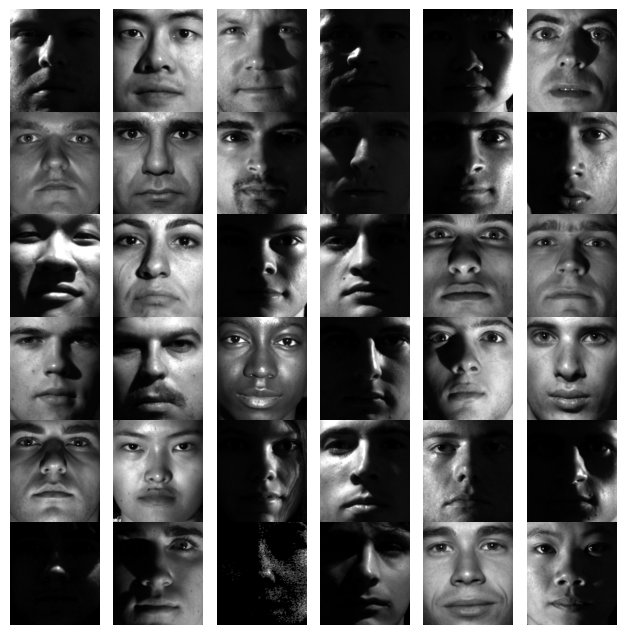

In [6]:
# Define the dimensions of the original images
m = 192
n = 168

# Plot the first 36 images in a 6x6 grid
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(8, 8))
face_number = 1

index = 0
for i in range(6):
    for j in range(6):
        # Reshape the current face to its original dimensions
        current_face = np.reshape(people[index], (m, n))
        ax[i][j].imshow(current_face, cmap='gray')
        ax[i][j].axis('off')
        index += 1

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

Now that we have all of the faces loaded, we will now proceed with the described previously algorithm for the PCA.

First we will have the faces demeaned and then we will have the SVD computed in order to get the necessary principal components.

In [7]:
# Calculating the "average" face and the basis for our faces
X_m, X_n = X.shape
print(X.shape)

average_face = np.mean(X, axis=1).reshape(m*n, 1)  #mn*1
ones = np.ones((1, X_n))
X_mean = average_face @ ones

A = X - X_mean  # normalized
print(A.shape)
U, S, V_T = sc.linalg.svd(A, full_matrices=False)
print(U.shape)
print(S.shape)
print(V_T.shape)

(32256, 2432)
(32256, 2432)
(32256, 2432)
(2432,)
(2432, 2432)


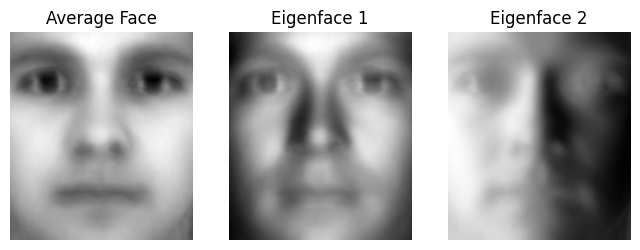

In [8]:
# Show the eigenfaces
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

axs[0].imshow(average_face.reshape(m, n), cmap="gray")
axs[0].set_title("Average Face")
axs[0].axis("off")

axs[1].imshow(U[:, 0].reshape(m,n),cmap="gray")
axs[1].set_title("Eigenface 1")
axs[1].axis("off")

axs[2].imshow(U[:, 1].reshape(m,n),cmap="gray")
axs[2].set_title("Eigenface 2")
axs[2].axis("off")

plt.show()

Basically our matrix U is the basis where all our eigenfaces are located. Now, suppose that we have the new image vector $x$. We can project the face into our $k$-rank truncated eigenface space $U$ by premultiplying by $\tilde{U^⊤_k}$

$$
α=\tilde{U_k^⊤}x
$$

Now, in case that we want to recover the approximated version of our image, we can simply project it back into $\tilde{U_k}$:

$$
\hat{x} = \tilde{U_k}\tilde{U_k^⊤}x
$$

Let's perform all the necessary manipulations for the image that is not yet in the database and see if we can approximate the image with the $U_k$



In [9]:
import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual


test_face = np.array(Image.open("foreign_face.jpg"))
reshaped_test_face = np.reshape(test_face, (m*n, 1))

test_face_demeaned = reshaped_test_face - average_face

@interact(k=widget.IntSlider(min=1, max=min(m*n, len(S)), value=100), image=fixed(test_face))
def recover_face(k, image):
  recovered_face = average_face + U[:,:k] @ (U[:,:k].T @ test_face_demeaned)

  fig, axs = plt.subplots(2, 2, figsize=(10, 5))
  
  axs[0][0].imshow(test_face, cmap="gray")
  axs[0][0].set_title(f"Original Image")
  axs[0][0].axis("off")
  
  axs[0][1].imshow(recovered_face.reshape(m, n), cmap="gray")
  axs[0][1].set_title(f"{k}-Rank Approximation")
  axs[0][1].axis("off")

  # Plot singular values in logarithmic scale
  axs[1][0].semilogy(S, 'k')
  axs[1][0].axvline(x=k, color='r', linestyle='--', linewidth=0.5)
  axs[1][0].set_title('Singular Values (log scale)')
  axs[1][0].set_xlim([0, X_n])

  # Plot cumulative sum of singular values deivided by the total sum
  axs[1][1].plot(np.cumsum(S) / np.sum(S), 'k')
  axs[1][1].axvline(x=k, color='r', linestyle='--', linewidth=0.5)
  axs[1][1].set_title('Cumulative Sum of Singular Values')
  axs[1][1].set_xlim([0, X_n])
  axs[1][1].set_ylim([0, 1])

  plt.show()


interactive(children=(IntSlider(value=100, description='k', max=2432, min=1), Output()), _dom_classes=('widget…

Now let's explore further. The idea of reducing the person face into the lower dimension is that now instead of comparing the magapixels of data, we can instead project this image into the first couple of eigenfaces coordinates of $U^⊤$ and receive the reduced vector $α$, which can be kind of the "fingerprint" of the image in our new basis.

We can also show that in the lower dimension our images will cluster together. In the below code we will select the faces of the person 2 and 7 and then we will project their faces into the 5th and 6th column of U and as a result we will get our principle components 5 and 6 accordingly. In the plot we will represent the principle components 5 vs the principle components 6.



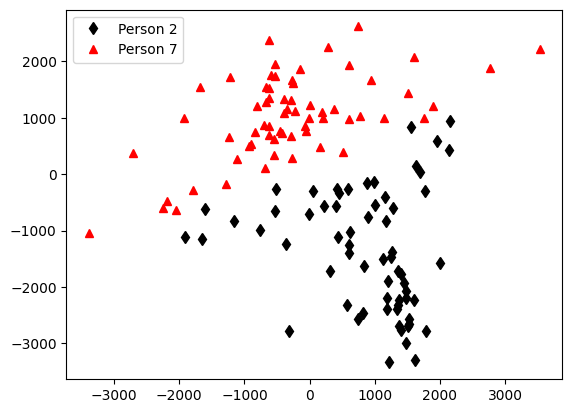

In [10]:
person1 = 2
person2 = 7
k = 64

person1_faces = X[:, (person1-1)*k:person1*k]
person2_faces = X[:, (person2-1)*k:person2*k]

ones = np.ones((1, 64))
X_mean = average_face @ ones

person1_demeaned = person1_faces - X_mean
person2_demeaned = person2_faces - X_mean

# Choose PCA_modes
PCA_modes = [5, 6]

# Projecting person 1 on PCA coordinates
PCA_coordinates_person1 = U[:,PCA_modes - np.ones_like(PCA_modes)].T @ person1_demeaned

# Projecting person 2 on PCA coordinates
PCA_coordinates_person2 = U[:,PCA_modes - np.ones_like(PCA_modes)].T @ person2_demeaned

plt.plot(PCA_coordinates_person1[0,:], PCA_coordinates_person1[1,:], "d", color="k", label="Person 2")
plt.plot(PCA_coordinates_person2[0,:], PCA_coordinates_person2[1,:], "^", color="r", label="Person 7")

plt.legend()
plt.show()

Since we are now able to project the persons face into the lower dimension and get their lower-dimensional representation $α$ we can use this reduces information in order to estimate how "close" the image of the arbitrary person is to the other pictures of people.

We will select the test face image of the arbitrary person and then compare it with all of the images of people reduced to the lower dimension via PCA. What we are going to use the Euclidean distance between PCA coordinates in order to estimate how closely related the test face is to the other people images. Then we will select the image which produced the minimal distance with our test face and, therefore, is the most similar one to our person.

First of all, we will define the faces which we will form the base of

In [11]:
# Traing set
upd_X = []
n = 1  # person number
k = 64
while (n-1)*k < X.shape[1]:
  i = (n-1)*k
  person = X[:,i:int(i+k/2)]
  upd_X.append(person)
  n += 1
upd_X = np.hstack(upd_X)

# Computing SVD
m, n = (192, 168)
average_face = np.mean(X, axis=1).reshape(m*n, 1)
ones = np.ones((1, upd_X.shape[1]))
X_mean = average_face @ ones

A = upd_X - X_mean
U, S, V_T = sc.linalg.svd(A, full_matrices=False)

(32256, 1216)
(1216,)
(1216, 1216)


Now, after we are done with the basis we can now construct the function which will find the PCA coordinates of the given faces and recognise the selected face by finding the minimal distance between the trained images PCA coordinates and test PCA coordinates.

In [12]:
# Get people PCA coordinates
num = 2
PCA_modes = [9, 10]

def PCA_analysis(num, PCA_modes):
  # Predefine variables
  k = 32
  people_PCA = []
  ones = np.ones((1,k))
  X_mean_person = average_face @ ones
  
  # Calculate PCA coordinates for people
  for i in range(1, int(upd_X.shape[1]/k+1)):
    person_faces = upd_X[:, (i-1)*k:i*k]
    demeaned_faces = person_faces - X_mean_person
    PCA_coordinates = U[:,PCA_modes - np.ones_like(PCA_modes)].T @ demeaned_faces
    people_PCA.append(PCA_coordinates)

  # Chose the face to recognize and calculate its PCA coordinates
  test_person = X[:, (num-1)*64+k]  # choose person not present in the trained set
  demeaned_test_person = test_person - X_mean_person[:,0]
  PCA_coordinates_test_person = U[:,PCA_modes - np.ones_like(PCA_modes)].T @ demeaned_test_person

  # Calculate distances
  distances = []
  for PCA_coordinates_person in people_PCA:
    for i in range(PCA_coordinates_person.shape[1]):
      distance = np.linalg.norm(PCA_coordinates_test_person - PCA_coordinates_person[:,i])
      distances.append(distance)

  # Find closest match
  closest_match = np.argmin(distances)
  closest_person = int(np.floor(closest_match/32) + 1)

  return num, closest_person


PCA_analysis(num, PCA_modes)

(2, 2)

Now that we have the algorithm written, we can test it on all of the faces that we have in our database. We will select each person's face that is not present in our training set as a test face, reduce it dimension and compute the minimal distance between the reduced face and faces in the trained set, thereby trying to recognise the face. We will record the number of the successful recognisions and then make conclusions about the algorithm.

In [13]:
# Testing how much faces are correctly recognised
PCA_modes = [9, 10, 11, 19, 20, 21, 49, 50, 51, 99, 100, 101, 199, 200, 201, 299, 300]
total_faces = int(upd_X.shape[1]/32)

correctly_recognised = 0
for face in trange(total_faces, desc="Faces tested"):
  real, recognised = PCA_analysis(face+1, PCA_modes)
  if real == recognised:
    correctly_recognised += 1

correct_percentage = np.round(correctly_recognised / total_faces * 100)
index = ["total faces", "correctly recognised", "percentage of all"]
summary = pd.DataFrame([int(total_faces), int(correctly_recognised), f"{int(correct_percentage)}%"], index=index)
summary

Faces tested:   0%|          | 0/38 [00:00<?, ?it/s]

,0
total faces,38
correctly recognised,23
percentage of all,61%


As we can see, our algorithm resulted in the 61% precision in face recognition.

There are certain adjustments that could be make to improve the performance of the PCA.
- First of all, since our principal components are the facial features that we extract, it is still possible to consider more principal components, so that we could consider more details of the person face, thus improving the quality of recognition.
- Another point that can be made is that basically, we should pay more attention to how we select basis for the face recognition. In the code that we provided, we excluded the first half of the each person's faces, however, it is still possible that some faces selected are not diverse enough to provide the good basis. For exmaple, it would be a nice idea to keep evenly distributed lightnings in the selected faces, so that, for example, for an arbitrary person, its faces in the basis won't be either only shadowed or lightened
- And last but not least, we can also try to use another way of recognising images. For example, we can try using the Linear Discriminant Analysis (LDA) or other classification method instead of using the euclidean distance.

## Conclusions